# Table des matières

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">A la rencontre du Dr. Ignaz Semmelweis</a></li>
        <li><a href="#ref2">Le nombre alarmant de morts</a></li>
        <li><a href="#ref3">Mort aux cliniques</a></li>
        <li><a href="#ref4">Le lavage des mains commence</a></li>
        <li><a href="#ref5">L'effet du lavage des mains</a></li>
        <li><a href="#ref6">L'effet du lavage des mains mis en évidence</a></li>
        <li><a href="#ref7">Plus de lavage des mains, moins de décès?</a></li>
        <li><a href="#ref8">Une analyse statistique sur les données de Semmelweis</a></li>
        <li><a href="#ref9">Le destin de Dr. Semmelweis</a></li>
    </ol>
</div>
<br>

<a id="ref1"></a>
## A la rencontre du Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="datasets/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>Il s'agit du docteur Ignaz Semmelweis, un médecin hongrois né en 1818 et exerçant à l'hôpital général de Vienne. Si le Dr Semmelweis semble troublé, c'est probablement parce qu'il pense à la <em>fièvre infantile</em>: une maladie mortelle affectant les femmes qui viennent d'accoucher. Il y réfléchit parce qu'au début des années 1840, à l'Hôpital général de Vienne, 10% des femmes qui accouchaient en mouraient. Il y réfléchit parce qu'il connaît la cause de la fièvre de l'enfance: ce sont les mains contaminées des médecins qui aident les femmes à accoucher. Ces derniers ne l'écouteront pas et <em>s'en laveront les mains</em>!</p>
<p>Dans ce notebook, nous allons réanalyser les données qui ont permis à Semmelweis de découvrir l’importance du <em>lavage des mains</em>. Commençons par examiner les données qui ont permis à Semmelweis de se rendre compte que les procédures à l’Hôpital général de Vienne avaient un problème.</p>

In [1]:
# Load in the tidyverse package
library(tidyverse)

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly <- read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
yearly

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  year = col_double(),
  births = col_double(),
  deaths = col_double(),
  clinic = col_character()
)



year,births,deaths,clinic
<dbl>,<dbl>,<dbl>,<chr>
1841,3036,237,clinic 1
1842,3287,518,clinic 1
1843,3060,274,clinic 1
1844,3157,260,clinic 1
1845,3492,241,clinic 1
1846,4010,459,clinic 1
1841,2442,86,clinic 2
1842,2659,202,clinic 2
1843,2739,164,clinic 2


<a id="ref2"></a>
## Le nombre alarmant de morts
<p>Le tableau ci-dessus montre le nombre de femmes accouchant dans les deux cliniques de l'Hôpital général de Vienne pour les années 1841 à 1846. Vous remarquerez que l'accouchement était très dangereux; un nombre <em>alarmant</em> de femmes sont décédées des suites d'un accouchement, la plupart d'entre elles à la suite d'une fièvre infantile.</p>
<p>Nous le voyons plus clairement si nous examinons la <em>proportion de décès</em> par rapport au nombre de femmes donnant naissance. Zoomons sur la proportion de décès à la clinique 1.</p>

In [2]:
# Adding a new column to yearly with proportion of deaths per no. births
yearly <- yearly %>% mutate(proportion_deaths = deaths / births)

# Print out yearly
yearly

year,births,deaths,clinic,proportion_deaths
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1841,3036,237,clinic 1,0.07806324
1842,3287,518,clinic 1,0.15759051
1843,3060,274,clinic 1,0.08954248
1844,3157,260,clinic 1,0.08235667
1845,3492,241,clinic 1,0.06901489
1846,4010,459,clinic 1,0.11446384
1841,2442,86,clinic 2,0.03521704
1842,2659,202,clinic 2,0.07596841
1843,2739,164,clinic 2,0.05987587


<a id="ref3"></a>
## Mort aux cliniques
<p>Si nous calculons maintenant la proportion de décès à la clinique 1 et à la clinique 2, nous verrons une tendance curieuse ...</p>

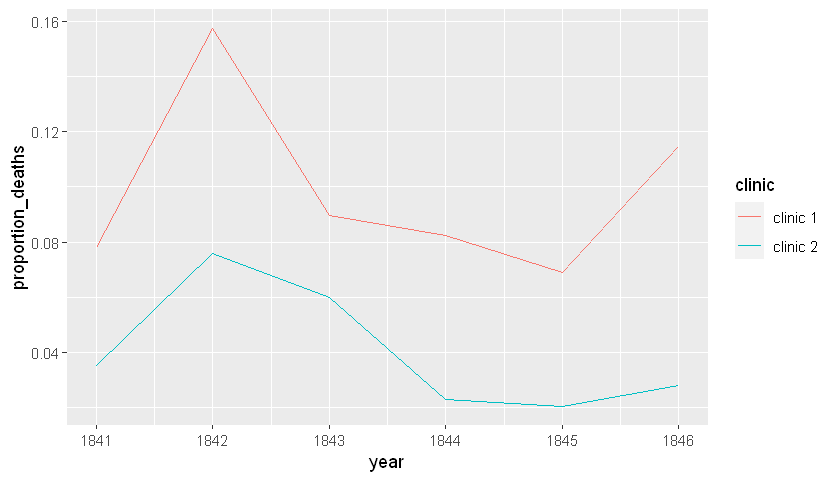

In [3]:
# Setting the size of plots in this notebook
options(repr.plot.width=7, repr.plot.height=4)

# Plot yearly proportion of deaths at the two clinics
p <- ggplot(yearly, aes(year, proportion_deaths, color = clinic))
p + geom_line()

<a id="ref4"></a>
## Le lavage des mains commence
<p>Pourquoi la proportion de décès est-elle constamment aussi élevée dans la clinique 1? Semmelweis a vu le même modèle et était perplexe et angoissé. La seule différence entre les cliniques était que beaucoup d'étudiants en médecine excerçaient à la clinique 1, alors que c'étaient des sages-femmes à la clinique 2. Alors que les sages-femmes ne s'occupaient que des femmes qui donnaient naissance, les étudiants en médecine ont également passé du temps dans les salles d'autopsie pour examiner les cadavres.</p>
<p>Semmelweis a commencé à soupçonner que quelque chose sur les cadavres, répendu sur les mains des étudiants en médecine, a provoqué une fièvre infantile. Donc, dans une tentative désespérée pour arrêter le taux de mortalité élevé, il a décrété: <em>Lavez-vous les mains!</em> C’était une demande peu orthodoxe et controversée, personne à Vienne n’avait entendu parler des bactéries pour le moment. </p>
<p>Chargeons les données mensuelles de la clinique 1 pour voir si le lavage des mains a eu un effet.</p>

In [4]:
# Read datasets/monthly_deaths.csv into monthly
monthly <- read_csv('datasets/monthly_deaths.csv')

# Adding a new column with proportion of deaths per no. births
monthly <- monthly %>% mutate(proportion_deaths = deaths / births)

# Print out the first rows in monthly
head(monthly)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  births = col_double(),
  deaths = col_double()
)



date,births,deaths,proportion_deaths
<date>,<dbl>,<dbl>,<dbl>
1841-01-01,254,37,0.145669291
1841-02-01,239,18,0.075313808
1841-03-01,277,12,0.043321300
1841-04-01,255,4,0.015686275
1841-05-01,255,2,0.007843137
1841-06-01,200,10,0.050000000


<a id="ref5"></a>
## L'effet du lavage des mains
<p>Avec les données chargées, nous pouvons maintenant examiner la proportion de décès dans le temps. Dans le graphique ci-dessous, nous n'avons pas indiqué où le lavage obligatoire des mains avait commencé, mais la proportion de décès a tellement réduit que vous devriez pouvoir le repérer!</p>

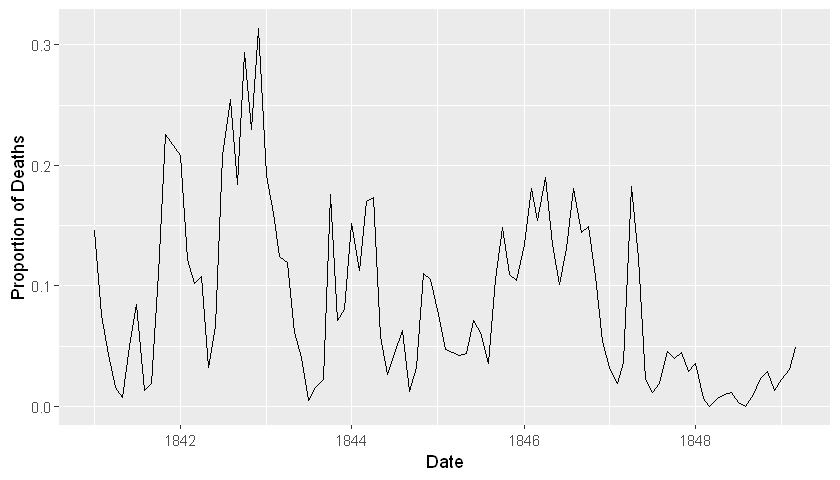

In [5]:
# Plot monthly proportion of deaths
p <- ggplot(monthly, aes(date, proportion_deaths))
p + geom_line() + labs(x = 'Date', y = 'Proportion of Deaths')

<a id="ref6"></a>
## L'effet du lavage des mains mis en évidence
<p>À partir de l'été 1847, la proportion de décès s'est considérablement réduite et c'est effectivement à ce moment-là que Semmelweis a rendu obligatoire le lavage des mains. </p>
<p>L'effet du lavage des mains est encore plus clair si nous le soulignons dans le graphique.</p>

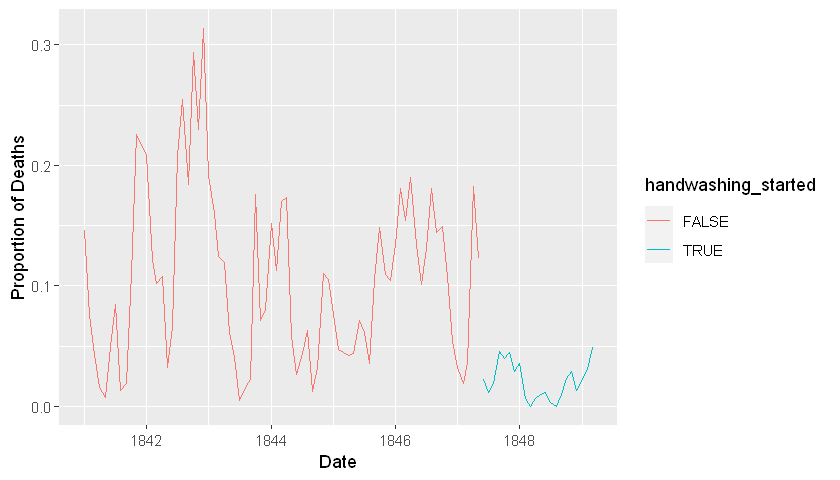

In [6]:
# From this date handwashing was made mandatory
handwashing_start = as.Date('1847-06-01')

# Add a TRUE/FALSE column to monthly called handwashing_started
monthly <- monthly %>% mutate(handwashing_started = date >= handwashing_start)

# Plot monthly proportion of deaths before and after handwashing
p <- ggplot(monthly, aes(date, proportion_deaths, color = handwashing_started))
p + geom_line() + labs(x = 'Date', y = 'Proportion of Deaths')

<a id="ref7"></a>
## Plus de lavage des mains, moins de décès?
<p>Encore une fois, le graphique montre que le lavage des mains a eu un effet considérable. Combien a-t-il réduit la proportion mensuelle de décès en moyenne?</p>

In [7]:
# Calculating the mean proportion of deaths 
# before and after handwashing.
monthly_summary <- monthly %>% 
                    group_by(handwashing_started) %>% 
                        summarise(mean_proportion_deaths = mean(proportion_deaths))

# Printing out the summary.
monthly_summary

handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338


<a id="ref8"></a>
## Une analyse statistique sur les données de Semmelweis
<p>Cela a réduit la proportion de décès d'environ 8 points de pourcentage! De 10% en moyenne à seulement 2% (chiffre qui reste élevé par rapport aux normes modernes).</p>
<p>Pour avoir une idée de l’incertitude entourant la réduction du nombre de décès dus au lavage des mains, nous pourrions examiner un intervalle de confiance (ici calculé à l'aide d'un test t).</p>

In [8]:
# Calculating a 95% Confidence intrerval using t.test 
test_result <- t.test( proportion_deaths ~ handwashing_started, data = monthly)
test_result


	Welch Two Sample t-test

data:  proportion_deaths by handwashing_started
t = 9.6101, df = 92.435, p-value = 1.445e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06660662 0.10130659
sample estimates:
mean in group FALSE  mean in group TRUE 
         0.10504998          0.02109338 


<a id="ref9"></a>
## Le destin de Dr. Semmelweis
<p>Le lavage des mains réduit donc la proportion de décès de 6,7 à 10 points de pourcentage, selon un intervalle de confiance de 95%. Dans l’ensemble, il semblerait que Semmelweis disposait de preuves solides que le lavage des mains était une procédure simple mais très efficace pouvant sauver de nombreuses vies.</p>
<p>La tragédie est que, malgré les preuves, la théorie de Semmelweis - selon laquelle la fièvre infantile était causée par une "substance" (ce que nous appelons aujourd'hui les <em>bactéries</em>) de cadavres dans une salle d'autopsie — a été ridiculisé par les scientifiques contemporains. La communauté médicale a en grande partie rejeté sa découverte et, en 1849, il a été contraint de quitter définitivement l'Hôpital général de Vienne.</p>
<p>Une des raisons à cela est que la statistique et les arguments statistiques étaient rares en science médicale au XIXe siècle. Semmelweis n'a publié ses données que sous forme de longs tableaux de données brutes, mais n'a montré aucun graphique ni intervalle de confiance. S'il avait eu accès à l'analyse que nous venons de préparer, il aurait peut-être mieux réussi à faire laver les mains des médecins viennois.</p>

In [9]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands <- TRUE

# Merci d'avoir lu ce notebook!

<strong>Auteur:</strong>  <a href="https://www.linkedin.com/in/oscieux/">Olivier Scieux</a>, Data Scientist & Actuaire Produit NextGen

<p>Pendant plus de 15 ans comme actuaire produit, <a href="https://www.linkedin.com/in/oscieux/"> Olivier Scieux </a> a eu pour missions de créer de nouvelles offres, étudier la rentabilité des portefeuilles, suivre les performances et les risques.</p>

<p>Conscient de l'impact de la révolution numérique sur les entreprises, il a repensé son métier et a trouvé un moyen pour apprivoiser cet environnement.</p>

<p>Devenu adepte des formations en ligne qu'il pratique quotidiennement, <a href="https://www.linkedin.com/in/oscieux/">Olivier Scieux</a> a acquis les connaissances en data science qui lui permettent aujourd'hui de proposer ses compétences de data scientist et d'actuaire produit nouvelle génération.</p>

<p>Grâce à son expertise, il aide les entreprises à mieux comprendre leurs données afin de leur donner du sens et d'en extraire de la valeur pour les aider à prendre des décisions stratégiques ou opérationnelles.</p>

<hr>

<p>Copyright &copy; 2020 <a href="https://oscieux.github.io/">OSDS</a>.</p>